In [1]:
# Getting necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage , fcluster
from sklearn.metrics import silhouette_samples,silhouette_score

In [2]:
# Creating DataFrame
crime_data = pd.read_csv('crime_data.csv')
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# EDA:
crime_data.rename(columns = {'Unnamed: 0' : 'State'},inplace = True)
crime_data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [6]:
crime_data.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
crime_data.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
crime_data.duplicated().sum()

0

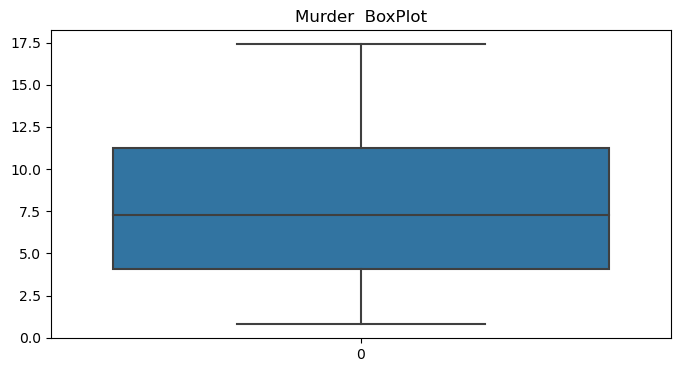

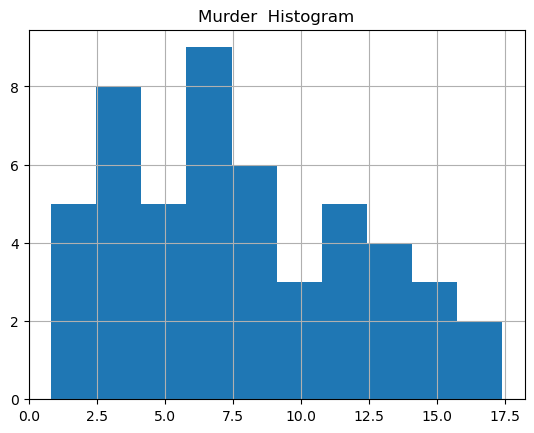

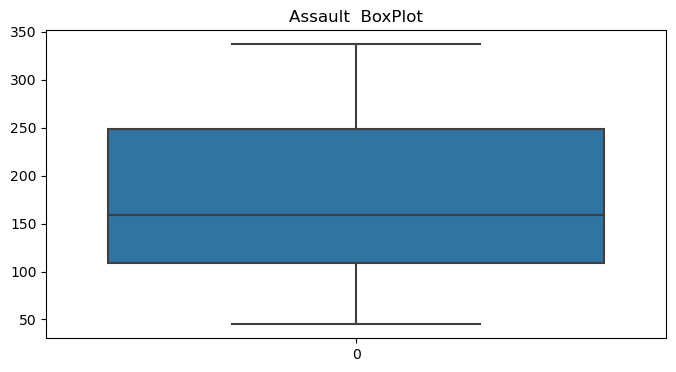

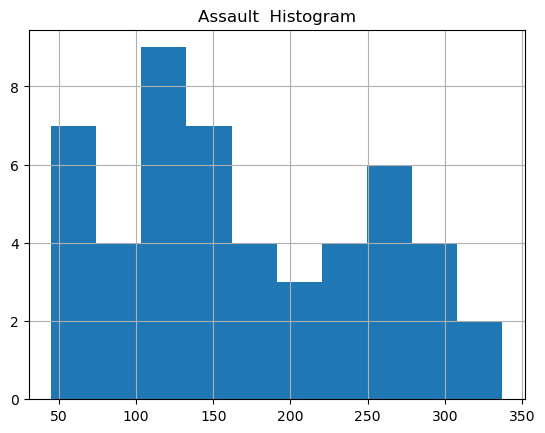

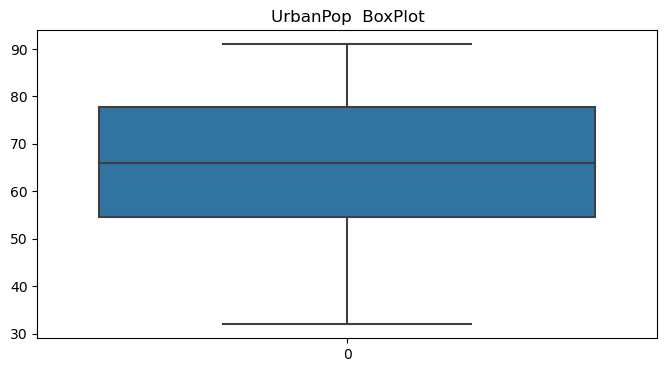

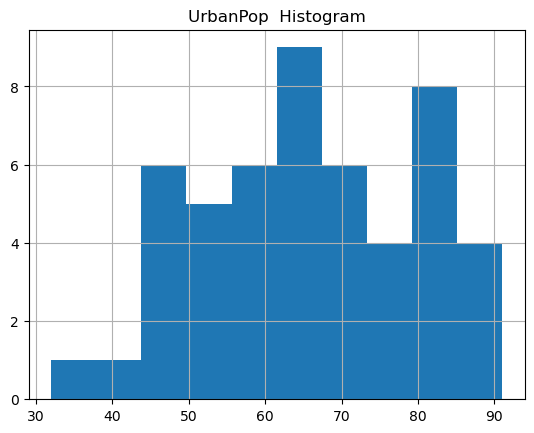

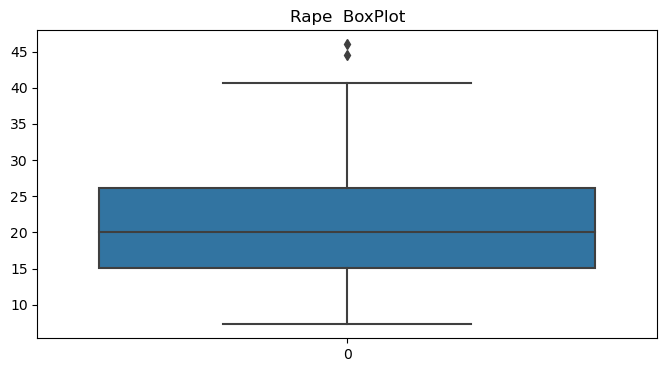

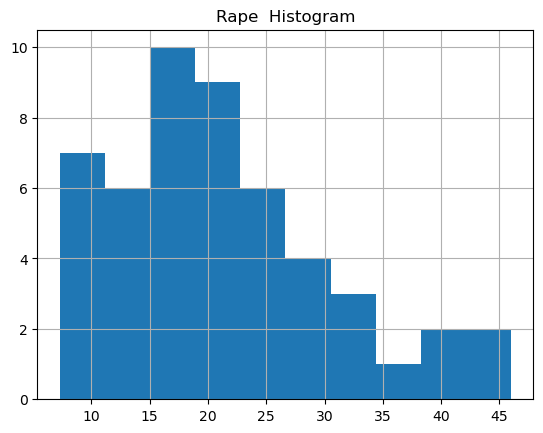

In [9]:
#Univariate Analysis:
for i in crime_data.columns.drop('State'):
    plt.figure(figsize = (8,4))
    sns.boxplot(data= crime_data[i])
    plt.title(i + '  BoxPlot')
    plt.show()
    crime_data[i].hist(bins = 10)
    plt.title(i + '  Histogram')
    plt.show()

In [10]:
# I'll use UrbanPop to create ratio of crime, and use it instead of crime count:
crime = crime_data.copy()
crime_original = crime_data.copy()
crime['murder'] = crime_data['Murder'].div(crime_data['UrbanPop'])
crime['assault'] = crime_data['Assault'].div(crime_data['UrbanPop'])
crime['rape'] = crime_data['Rape'].div(crime_data['UrbanPop'])
crime.head()

,State,Murder,Assault,UrbanPop,Rape,murder,assault,rape
0,Alabama,13.2,236,58,21.2,0.227586,4.068966,0.365517
1,Alaska,10.0,263,48,44.5,0.208333,5.479167,0.927083
2,Arizona,8.1,294,80,31.0,0.101250,3.675000,0.387500
3,Arkansas,8.8,190,50,19.5,0.176000,3.800000,0.390000
4,California,9.0,276,91,40.6,0.098901,3.032967,0.446154


In [11]:
#We'll drop 'State','Murder','Assault','UrbanPop' and 'Rape' from Crime so that we can proceed with standardization and clustering:
crime.drop(['State','Murder','Assault','UrbanPop','Rape'],axis = 1 , inplace = True)
crime.head()

,murder,assault,rape
0,0.227586,4.068966,0.365517
1,0.208333,5.479167,0.927083
2,0.101250,3.675000,0.387500
3,0.176000,3.800000,0.390000
4,0.098901,3.032967,0.446154


In [12]:
#Standardize the data using Standard Scaler:
scaler = StandardScaler()
crime1 = scaler.fit_transform(crime)
crime1 = pd.DataFrame(crime1,columns=crime.columns)
crime1.head(10)


,murder,assault,rape
0,1.318957,0.986750,0.286975
1,1.074293,1.978738,4.445543
2,-0.286515,0.709620,0.449764
3,0.663403,0.797549,0.468277
4,-0.316364,0.257990,0.884113
5,-0.286107,-0.035754,1.254379
6,-1.028567,-0.870602,-1.352274
7,-0.531848,0.449739,-0.794739
8,0.873084,1.070131,0.533073
9,2.112107,0.598242,0.764489


## Clustering : Hierarchical

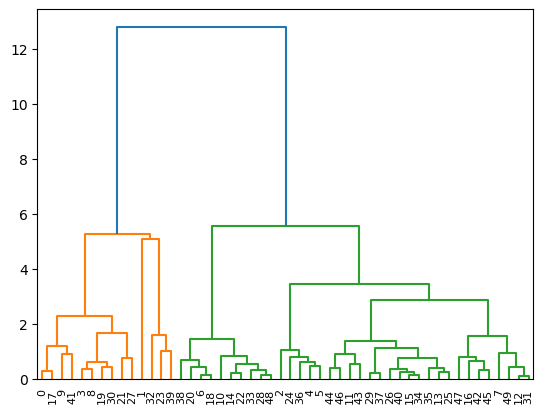

In [13]:
#Plotting dendogram using Ward linkage and Euclidean distance metric:
ward_eucli_link = linkage(crime1,method = 'ward', metric = 'euclidean')
Dend_ward = dendrogram(ward_eucli_link)

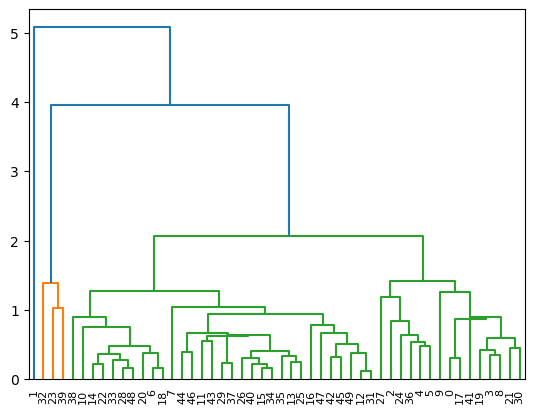

In [14]:
#Plotting dendogram using centroid linkage and Euclidean distance metric:
centroid_eucli_link = linkage(crime1,method = 'centroid', metric = 'euclidean')
Dend_centroid = dendrogram(centroid_eucli_link)

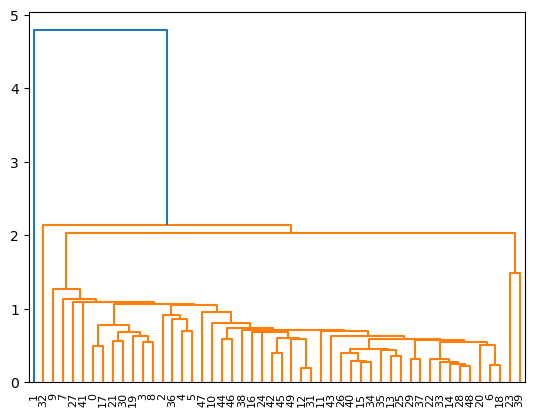

In [15]:
# Performing hierarchial clustering with Manhattan distance 
# and using the single linkage criterion:

single_city_link = linkage(crime1,method = 'single', metric = 'cityblock')
Dend_single = dendrogram(single_city_link)

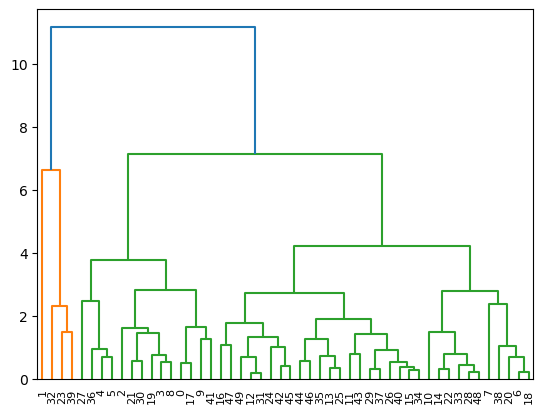

In [16]:
# Performing hierarchial clustering with Manhattan distance 
# and using the complete linkage criterion:

complete_city_link = linkage(crime1,method = 'complete', metric = 'cityblock')
Dend_complete = dendrogram(complete_city_link)

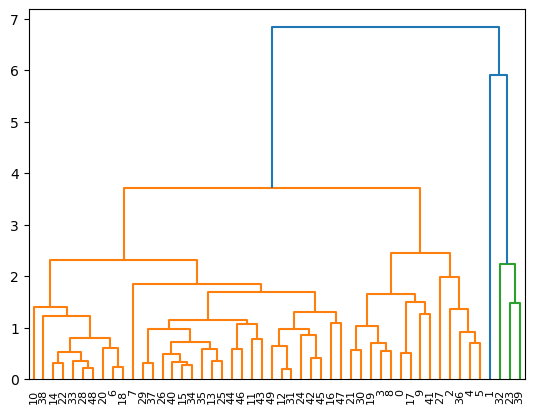

In [17]:
# Performing hierarchial clustering with Manhattan distance 
# and using the average linkage criterion:

avg_city_link = linkage(crime1,method = 'average', metric = 'cityblock')
Dend_average = dendrogram(avg_city_link)

In [18]:
    clusters_2 = fcluster(ward_eucli_link,2,criterion='maxclust')
    clusters_2

array([1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

In [19]:
clusters_4 = fcluster(ward_eucli_link,4,criterion='maxclust')
clusters_4

array([1, 2, 4, 1, 4, 4, 3, 4, 1, 1, 3, 4, 4, 4, 3, 4, 4, 1, 3, 1, 3, 1,
       3, 2, 4, 4, 4, 1, 3, 4, 1, 4, 2, 3, 4, 4, 4, 4, 3, 2, 4, 1, 4, 4,
       4, 4, 4, 4, 3, 4], dtype=int32)

In [20]:
clusters = fcluster(ward_eucli_link,6,criterion='distance')
clusters

array([1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

In [21]:
#Let's add all three clusters to original dataframe
crime_original['clusters'] = clusters
crime_original['clusters_2'] = clusters_2
crime_original['clusters_4'] = clusters_4
crime_original

,State,Murder,Assault,UrbanPop,Rape,clusters,clusters_2,clusters_4
0,Alabama,13.2,236,58,21.2,1,1,1
1,Alaska,10.0,263,48,44.5,1,1,2
2,Arizona,8.1,294,80,31.0,2,2,4
3,Arkansas,8.8,190,50,19.5,1,1,1
4,California,9.0,276,91,40.6,2,2,4
5,Colorado,7.9,204,78,38.7,2,2,4
6,Connecticut,3.3,110,77,11.1,2,2,3
7,Delaware,5.9,238,72,15.8,2,2,4
8,Florida,15.4,335,80,31.9,1,1,1
9,Georgia,17.4,211,60,25.8,1,1,1


In [22]:
# Now lets profile the clusters with mean:
crime_original.iloc[:,[1,2,4]].groupby(crime_original['clusters']).mean()

,Murder,Assault,Rape
clusters,,,
1,13.135714,259.928571,27.764286
2,5.708333,136.083333,18.691667


In [23]:
crime_original.iloc[:,[1,2,4]].groupby(crime_original['clusters_4']).mean()

,Murder,Assault,Rape
clusters_4,,,
1,13.040000,250.100000,28.850000
2,13.375000,284.500000,25.050000
3,2.890000,84.500000,11.750000
4,6.792308,155.923077,21.361538


In [24]:
crime_clust = crime_original.iloc[:,[1,2,4]].groupby(crime_original['clusters_2']).mean()
crime_clust

,Murder,Assault,Rape
clusters_2,,,
1,13.135714,259.928571,27.764286
2,5.708333,136.083333,18.691667


In [25]:
#Adding cluster frequency in main data frame:
crime_clust.reset_index(inplace=True)
crime_clust.rename(columns = {'clusters_2':'Cluster_Category'},inplace=True)

In [26]:
Cluster_Freq = crime_original['clusters_2'].value_counts().sort_index()

In [27]:
crime_clust['Cluster_Freq'] =Cluster_Freq.values
crime_clust

,Cluster_Category,Murder,Assault,Rape,Cluster_Freq
0,1,13.135714,259.928571,27.764286,14
1,2,5.708333,136.083333,18.691667,36


In [28]:
totalsum = crime_clust['Cluster_Freq'].sum()
percenta = (crime_clust['Cluster_Freq']/totalsum)*100
percenta
# 28% people (Cluster 1) are more violent

0    28.0
1    72.0
Name: Cluster_Freq, dtype: float64

## Clustering : KMeans

In [29]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(crime1)
kmeans.labels_

C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1])

In [30]:
kmeans.inertia_

68.3050057077592

In [31]:
wss = []
SS = []
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(crime1)
    wss.append(KM.inertia_)
    SS.append(silhouette_score(crime1,KM.labels_))

C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [32]:
wss

[68.3050057077592,
 48.01375788562603,
 35.029916632907835,
 23.97939721595287,
 18.580612451145075,
 15.164948724216309,
 13.197390016932475,
 12.102821016504574,
 10.834847641763801]

In [33]:
SS

[0.5093454728119902,
 0.43146454752689395,
 0.4387631533948714,
 0.37989266240511826,
 0.3680353280454446,
 0.3435242490540977,
 0.3434101867702519,
 0.32763335630322854,
 0.33047614463305736]

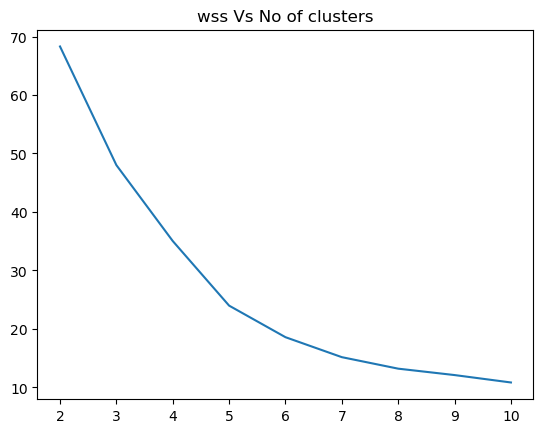

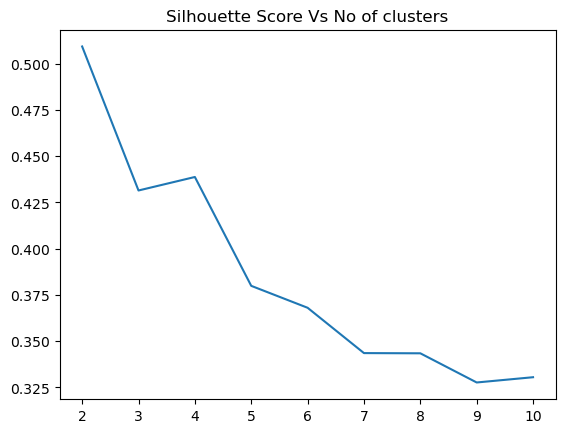

In [34]:
plt.plot(range(2,11),wss)
plt.title('wss Vs No of clusters')
plt.show()
plt.plot(range(2,11),SS)
plt.title('Silhouette Score Vs No of clusters')
plt.show()

In [35]:
#Lets's try 2 clusters:
kmeans = KMeans(n_clusters=2)
kmeans.fit(crime1)
labels = kmeans.labels_

C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
silhouette_score(crime1,labels)
##We are getting value closer to 1 so we'll proceed with 2 clusters and do profiling:

0.5093454728119902

In [37]:
crime2 = crime_original.iloc[:,[1,2,4]]
crime2['Cluster'] = labels
crime2.head()


C:\Users\Anup0\AppData\Local\Temp\ipykernel_16048\969403471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime2['Cluster'] = labels


,Murder,Assault,Rape,Cluster
0,13.2,236,21.2,1
1,10.0,263,44.5,1
2,8.1,294,31.0,0
3,8.8,190,19.5,1
4,9.0,276,40.6,0


In [38]:
crime_clust2=crime2.groupby('Cluster').mean()
crime_clust2.reset_index(inplace=True)
crime_clust2['Cluster_Freq']=crime2['Cluster'].value_counts()
crime_clust2

,Cluster,Murder,Assault,Rape,Cluster_Freq
0,0,5.708333,136.083333,18.691667,36
1,1,13.135714,259.928571,27.764286,14


In [39]:
totalsum = crime_clust2['Cluster_Freq'].sum()
percenta = (crime_clust2['Cluster_Freq']/totalsum)*100
percenta
# 28% people (Cluster 1) are more violent.
# Getting same result as Hierchical clustering.

0    72.0
1    28.0
Name: Cluster_Freq, dtype: float64

## Clustering DBSCAN:

In [40]:
#Attempt 1:
temp_crime = crime_data.copy()
temp_crime = temp_crime.iloc[:,[1,2,4]]

In [41]:
X = crime1.values
db = DBSCAN(eps=0.8,min_samples=5).fit(X)
labels = db.labels_
labels

array([ 0, -1,  1,  0,  1,  1,  1,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1, -1,  1,  1,  1,  0,  1,  1,  0,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [42]:
temp_crime['Cluster'] = labels

In [43]:
freq = temp_crime['Cluster'].value_counts().sort_index()
freq

-1     5
 0     9
 1    36
Name: Cluster, dtype: int64

<Axes: xlabel='Rape', ylabel='Assault'>

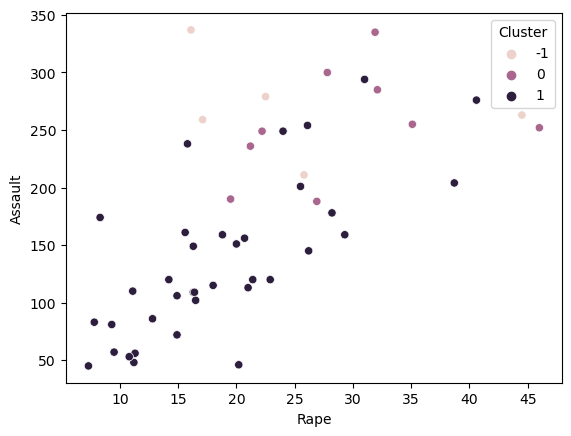

In [44]:
sns.scatterplot(x= 'Rape',y = 'Assault',hue = 'Cluster',data = temp_crime)

In [45]:
temp_crime.groupby('Cluster').mean()

,Murder,Assault,Rape
Cluster,,,
-1,14.180000,269.800000,25.200000
0,12.555556,254.444444,29.188889
1,5.708333,136.083333,18.691667


In [46]:
silhouette_score(crime1,labels)

0.399081644583875

In [47]:
#Attempt 2:
temp_crime = crime_data.copy()
temp_crime = temp_crime.iloc[:,[1,2,4]]
X = crime1.values
db = DBSCAN(eps=0.5,min_samples=2).fit(X)
labels = db.labels_
temp_crime['Cluster'] = labels
profiling = temp_crime.groupby('Cluster').mean().reset_index()
freq = temp_crime['Cluster'].value_counts().sort_index()
sc = silhouette_score(crime1,labels)
print(profiling)
print("\n\n Frequency : \n" ,freq)
print("\n\n silhouette_score is : " ,sc)

   Cluster     Murder     Assault       Rape
0       -1  10.253846  224.076923  24.676923
1        0  14.300000  242.500000  21.700000
2        1  11.800000  273.000000  29.280000
3        2   8.450000  240.000000  39.650000
4        3   5.592308  119.307692  16.703846
5        4   3.100000   96.500000  18.700000


 Frequency : 
 -1    13
 0     2
 1     5
 2     2
 3    26
 4     2
Name: Cluster, dtype: int64


 silhouette_score is :  -0.00939489548413871


In [48]:
#Attempt 3:
temp_crime = crime_data.copy()
temp_crime = temp_crime.iloc[:,[1,2,4]]
X = crime1.values
db = DBSCAN(eps=0.5,min_samples=3).fit(X)
labels = db.labels_
temp_crime['Cluster'] = labels
profiling = temp_crime.groupby('Cluster').mean().reset_index()
freq = temp_crime['Cluster'].value_counts().sort_index()
sc = silhouette_score(crime1,labels)
print(profiling)
print("\n\n Frequency : \n" ,freq)
print("\n\n silhouette_score is : " ,sc)

   Cluster     Murder     Assault       Rape
0       -1   9.736842  214.263158  25.310526
1        0   5.592308  119.307692  16.703846
2        1  11.800000  273.000000  29.280000


 Frequency : 
 -1    19
 0    26
 1     5
Name: Cluster, dtype: int64


 silhouette_score is :  0.18114779496346864


In [49]:
#Attempt 4:
temp_crime = crime_data.copy()
temp_crime = temp_crime.iloc[:,[1,2,4]]
X = crime1.values
db = DBSCAN(eps=0.6,min_samples=4).fit(X)
labels = db.labels_
temp_crime['Cluster'] = labels
profiling = temp_crime.groupby('Cluster').mean().reset_index()
freq = temp_crime['Cluster'].value_counts().sort_index()
sc = silhouette_score(crime1,labels)
print(profiling)
print("\n\n Frequency : \n" ,freq)
print("\n\n silhouette_score is : " ,sc)

   Cluster     Murder     Assault       Rape
0       -1  10.942857  235.000000  27.557143
1        0  12.033333  266.833333  27.933333
2        1   5.466667  121.566667  16.940000


 Frequency : 
 -1    14
 0     6
 1    30
Name: Cluster, dtype: int64


 silhouette_score is :  0.2674036639781606
